# Enunciado do Projeto

Neste mini-projeto, o objetivo é conectar esses conceitos a um problema real do
ambiente bancário, construindo uma prova de conceito (PoC) baseada em dados.
O foco não é apenas o modelo, mas a capacidade de identificar um gap real e
propor uma solução viável com ML.


Desafio
Cada grupo deverá:
Identificar um problema relevante do contexto bancário que possa ser
endereçado com Machine Learning, explicitar o gap existente e
apresentar uma solução baseada em dados.


Entrega
A apresentação deve ser clara, objetiva e focada na tomada de decisão e no PoC,
não apenas no código.
1. O problema e o gap
* Qual é o problema?
* Qual decisão hoje é mal feita, lenta ou inexistente?
* Onde está o gap que justifica o uso de ML?
2. Formulação do problema em ML
* Classificação ou regressão?
* Qual é a variável alvo?
* O que o modelo está tentando prever?
3. Análise dos dados
* Breve análise exploratória
* Correlação (uni e multivariada)
* Missings e possíveis vieses
4. Preparação dos dados
* Normalização ou padronização
* Tratamento de desbalanceamento (se aplicável)
* Justificativa das escolhas
5. Modelagem
* Pelo menos 2 modelos entre: Regressão logística, Árvore de decisão, Random Forest

É permitido (mas não obrigatório) utilizar outras técnicas não vistas em aula, desde
que: Sejam explicadas e Façam sentido para o problema
6. Avaliação
* Métrica adequada ao problema (accuracy, recall, precision, AUC, etc.)
* Comparação entre modelos
* Trade-offs relevantes (ex.: falso positivo vs falso negativo)
7. Conclusão executiva
* O modelo resolve o gap identificado?
* Onde ele falha?
* O que seria necessário para levar isso para produção?
* Há potencial de geração de valor (ex.: redução de custo, aumento de
eficiência, mitigação de risco)? Caso positivo, explore os resultados sob uma
ótica qualitativa ou estimada, considerando impacto financeiro, ROI ou
payback.
8. Riscos e limitações
* Riscos técnicos
* Riscos de viés
* Riscos regulatórios ou operacionais
9. Apresentação do PoC
Demonstração da solução concebida em funcionamento, preferencialmente como:
* Uma aplicação completa (ex.: Streamlit), e/ou
* Um notebook ou programa em Python executável via linha de comando.

Dataset: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn

# O problema e o gap



1. Qual é o problema?

O banco está perdendo clientes (churn), o que impacta:
* Lucro
* Cross-sell de produtos
* Custo de aquisição do cliente que já foi pago (adquirir novos clientes é caro).


2. Qual decisão hoje é mal feita, lenta ou inexistente?

Possíveis cenários atuais:
* Ações de retenção são reativas (após cancelamento) e não preventivas.
* Campanhas são enviadas para todos os clientes, falta priorização de clientes com maior risco de saída (churn).

Resultado:
* Desperdício de recursos
* Baixa eficiência em retenção


3. Onde está o gap que justifica o uso de ML?

Falta de previsão antecipada.
Hoje o banco reage ao churn, mas com ML o banco antecipa churn e age preventivamente.

O gap justifica ML porque:
* O churn depende de múltiplas variáveis.
* Relações sem sempre são lineares.
* Interações entre variáveis são difíceis de identificar manualmente.



---



**Discutido entre o grupo:**
* Encerramento de contas, resultando diretamente na redução do faturamento do banco.
* Inexistência de um mecanismo automatizado e suficientemente preciso para identificar clientes com alta probabilidade de churn.
* No mês X, em decorrência da liquidação do Banco Gold, o Nosso Banco adquiriu CDBs dessa instituição, o que ocasionou a saída de X% dos clientes.
* Aumento do risco de imagem e risco de crédito.
* A atuação do banco em relação ao churn é predominantemente reativa, não preventiva. As ações ocorrem apenas quando o cliente solicita o
* encerramento da conta, momento em que a probabilidade de sucesso na retenção é significativamente reduzida, pois a decisão já foi tomada.
* Direcionamento de campanhas: exemplo do uso de dados do relacionamento do cliente (ex.: Vias no relacionamento.caixa) para ofertar produtos de
* acordo com o perfil e aderência do cliente.
* Atualmente, cada colaborador da agência avalia a probabilidade de churn com base em sua intuição e experiência, tornando o processo subjetivo e altamente suscetível a falhas.
* Dificuldade na mensuração da efetividade da estratégia de churn, uma vez que cada colaborador atua de forma distinta, resultando em decisões descentralizadas e subjetivas.

# Formulação do problema em ML

1. Classificação ou regressão?
Classificação binária.

2.  Qual é a variável alvo?
Exited (1 = churn, 0 = não churn)

3.  O que o modelo está tentando prever?
Probabilidade de um cliente deixar o banco.


# Análise dos dados

## Breve análise exploratória

### Bibliotecas

In [ ]:
!pip install pingouin

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import pingouin as pg

from sklearn.pipeline import Pipeline
from scipy.stats import randint, loguniform
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_sample_weight

### Banco de Dados

In [ ]:
path = kagglehub.dataset_download("radheshyamkollipara/bank-customer-churn")
df_raw = pd.read_csv(f"{path}/Customer-Churn-Records.csv")

Using Colab cache for faster access to the 'bank-customer-churn' dataset.


In [ ]:
df = df_raw.copy()

In [ ]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,3,GOLD,342


### EDA

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


> Todas colunas possuem a mesma quantidade de dados, portanto, não há dados nulos.

array([[<Axes: title={'center': 'RowNumber'}>,
        <Axes: title={'center': 'CustomerId'}>,
        <Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>],
       [<Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>,
        <Axes: title={'center': 'Complain'}>],
       [<Axes: title={'center': 'Satisfaction Score'}>,
        <Axes: title={'center': 'Point Earned'}>, <Axes: >, <Axes: >]],
      dtype=object)

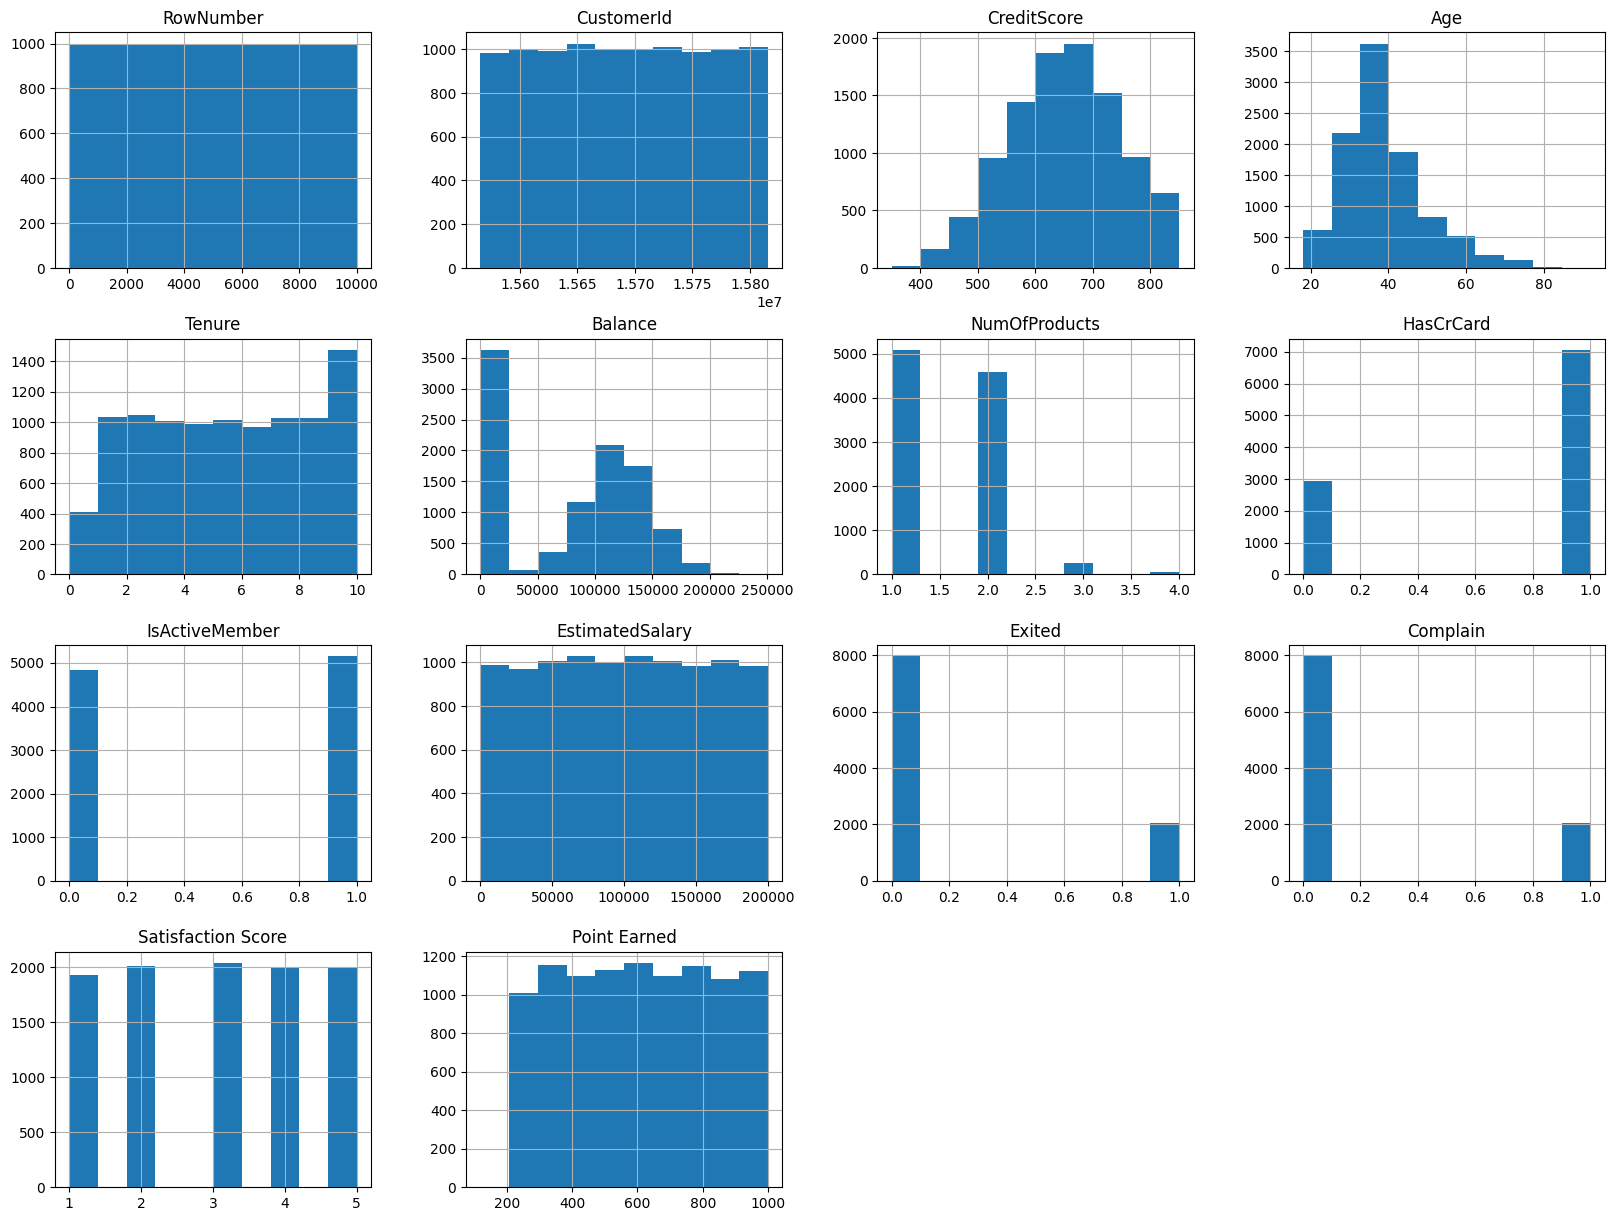

In [ ]:
df.hist(figsize=(20,15))

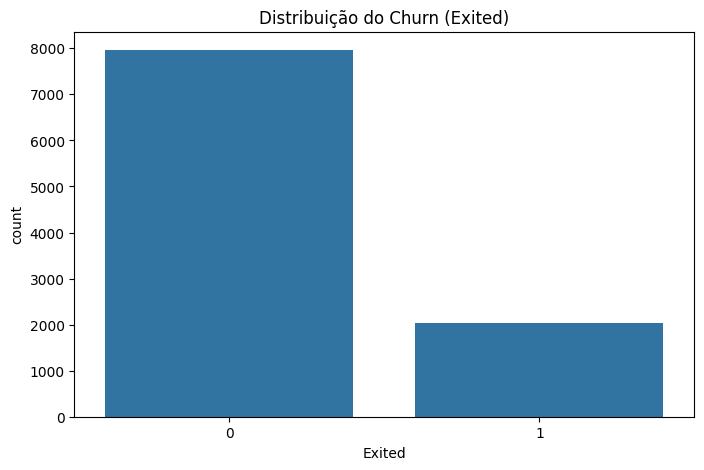

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x="Exited", data=df)
plt.title("Distribuição do Churn (Exited)")
plt.show()

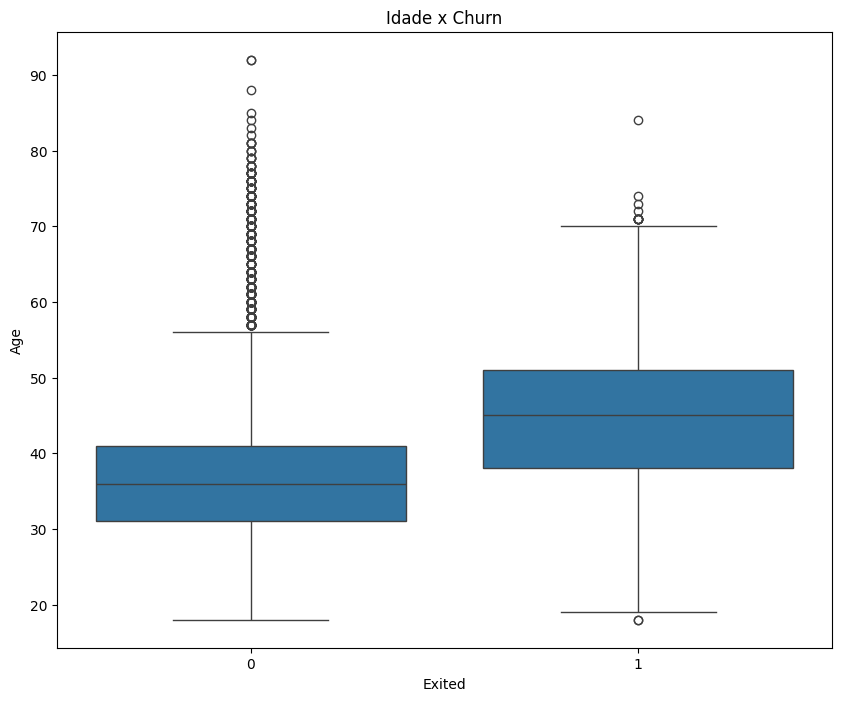

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Exited", y="Age", data=df)
plt.title("Idade x Churn")
plt.show()

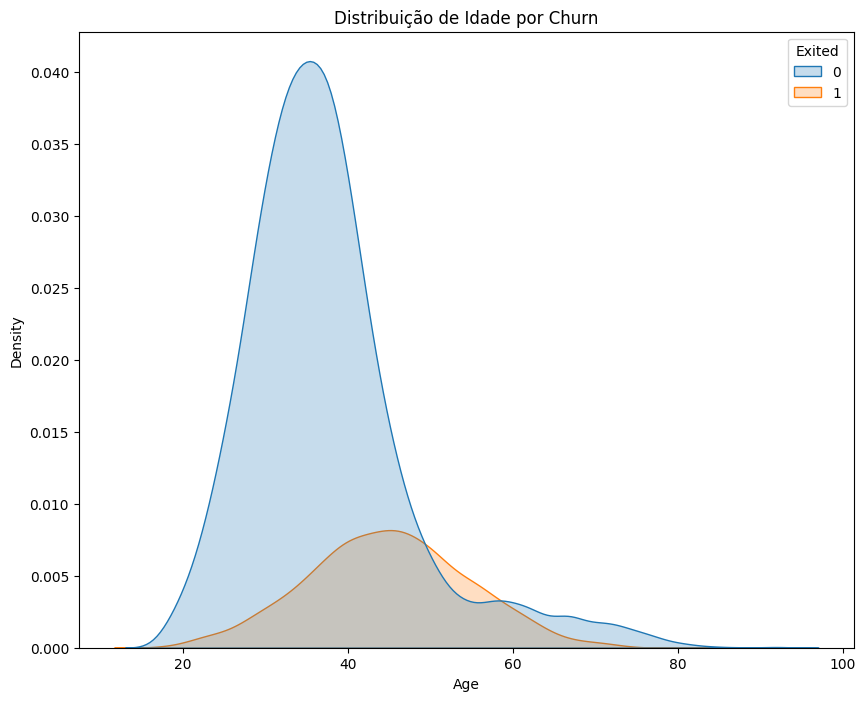

In [ ]:
plt.figure(figsize=(10,8))
sns.kdeplot(data=df, x="Age", hue="Exited", fill=True)
plt.title("Distribuição de Idade por Churn")
plt.show()

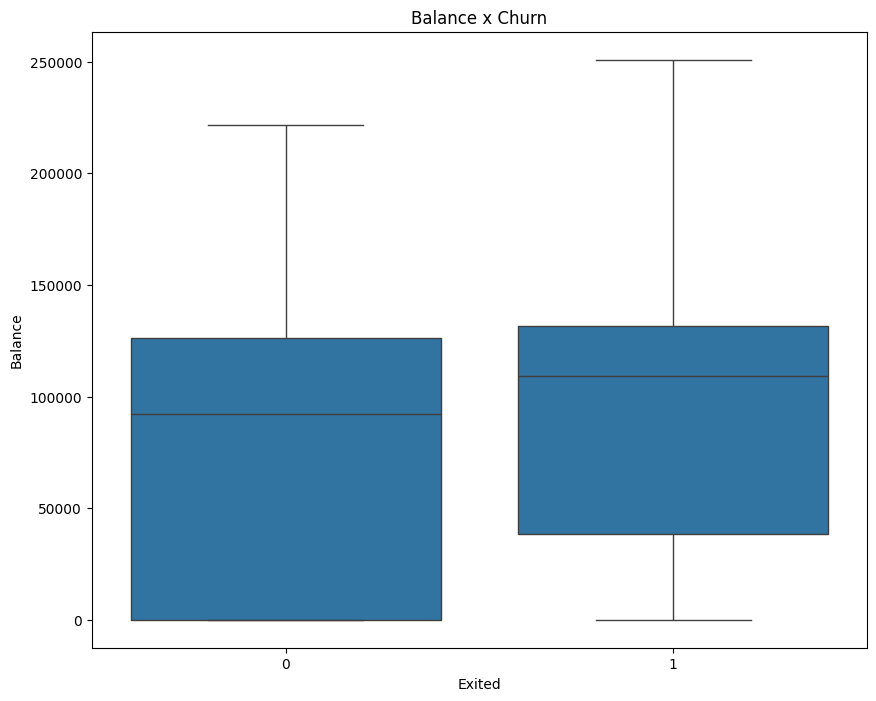

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Exited", y="Balance", data=df)
plt.title("Balance x Churn")
plt.show()

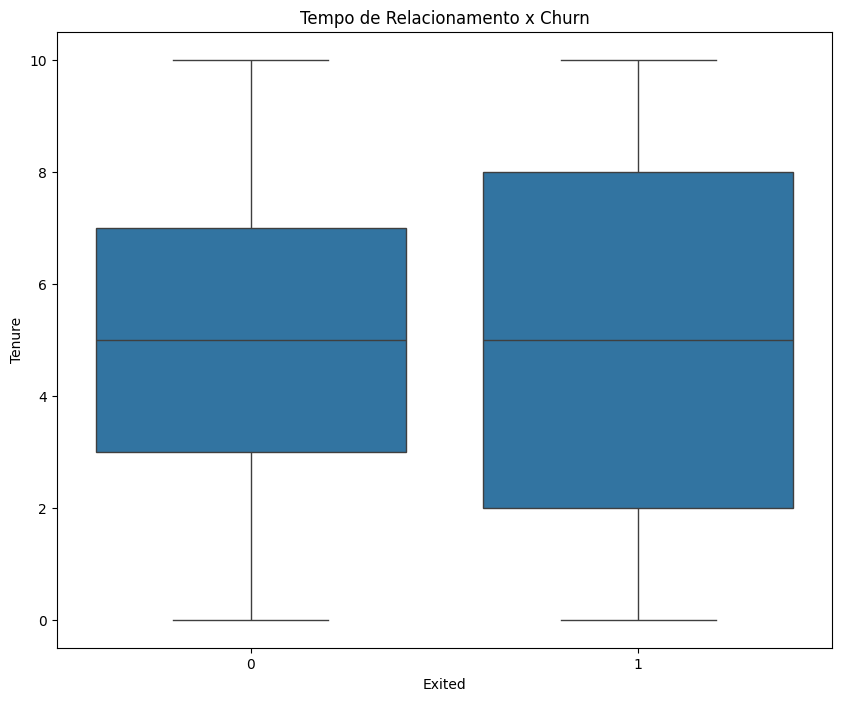

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Exited", y="Tenure", data=df)
plt.title("Tempo de Relacionamento x Churn")
plt.show()

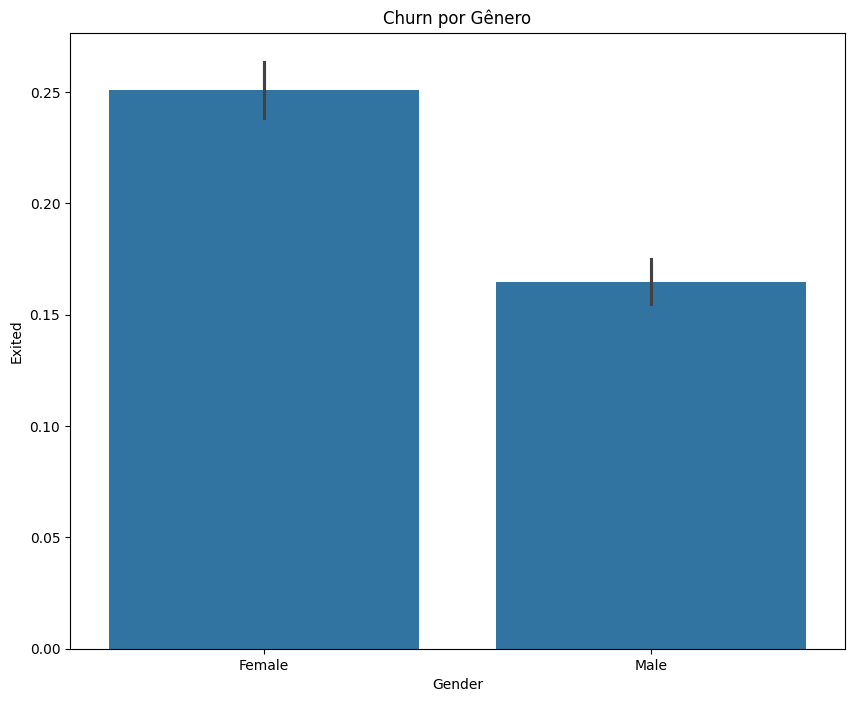

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x="Gender", y="Exited", data=df)
plt.title("Churn por Gênero")
plt.show()

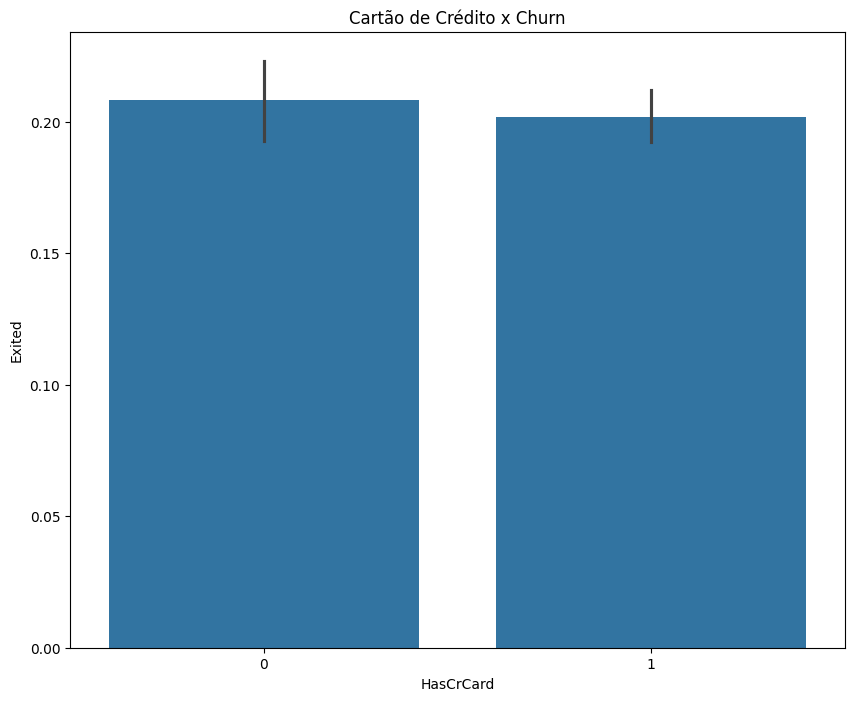

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x="HasCrCard", y="Exited", data=df)
plt.title("Cartão de Crédito x Churn")
plt.show()

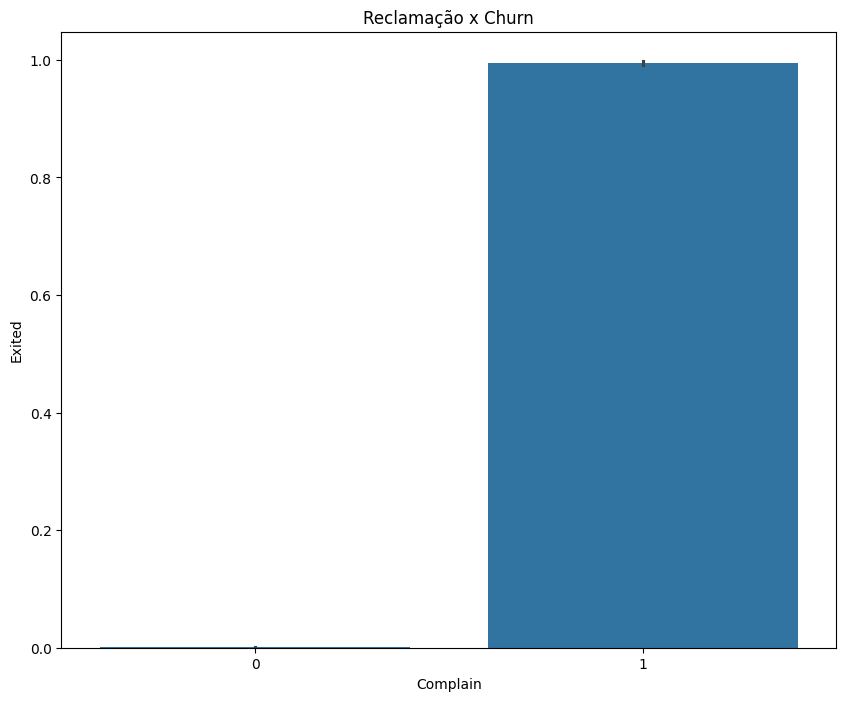

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x="Complain", y="Exited", data=df)
plt.title("Reclamação x Churn")
plt.show()

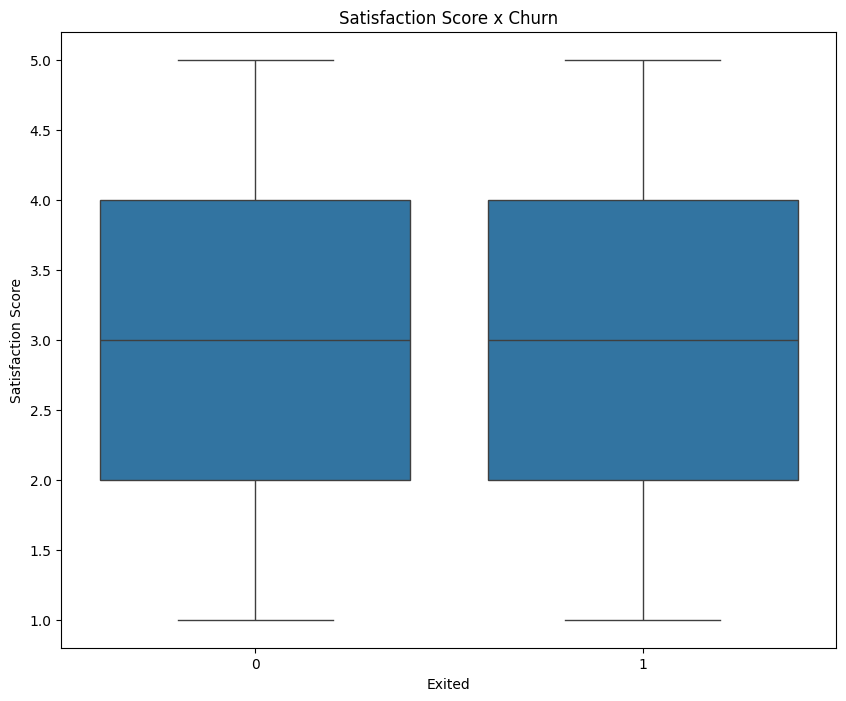

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Exited", y="Satisfaction Score", data=df)
plt.title("Satisfaction Score x Churn")
plt.show()

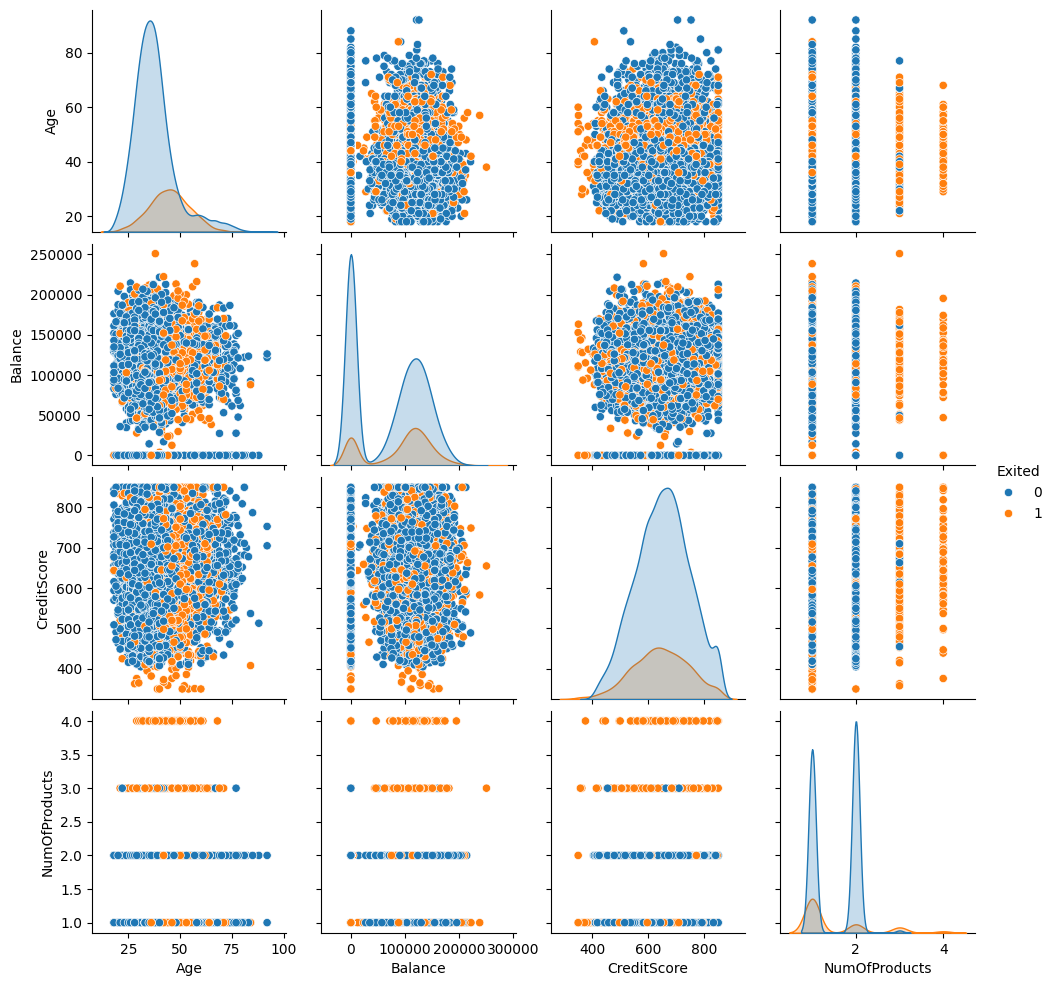

In [ ]:
sns.pairplot(
    df[["Age","Balance","CreditScore","NumOfProducts","Exited"]],
    hue="Exited"
)
plt.show()

> Vale a pena fazer uma análise direcionada a clientes de alto valor usando o balance e o quartil 0.75.


## Correlação (uni e multivariada)

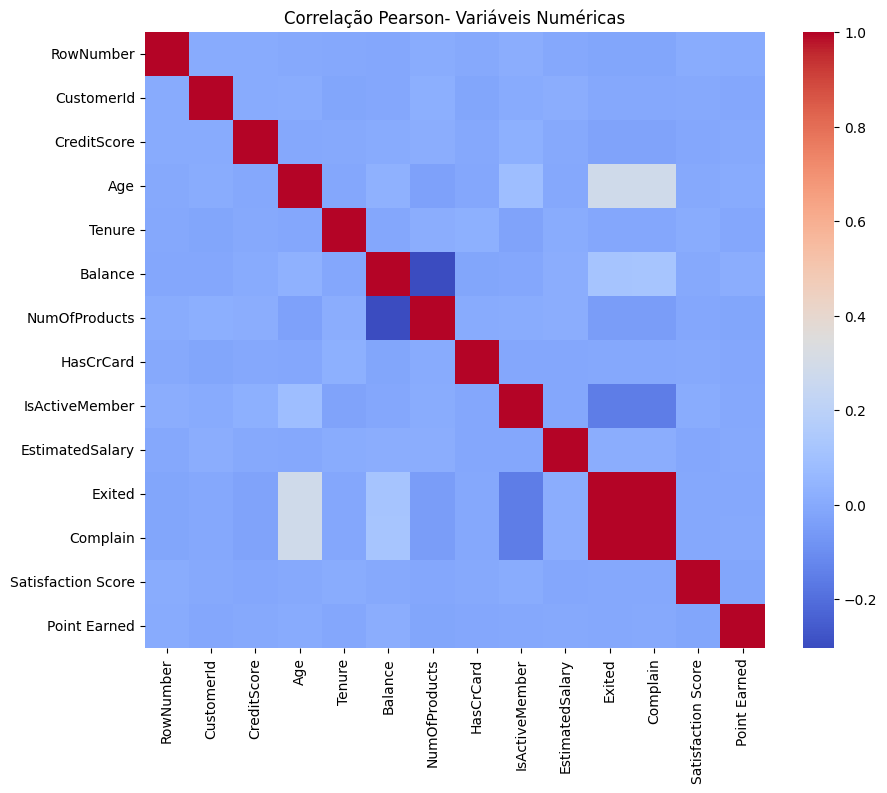

In [ ]:
pearson_corr = df.corr(method = 'pearson', numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(pearson_corr, cmap="coolwarm", annot=False)
plt.title("Correlação Pearson- Variáveis Numéricas")
plt.show()

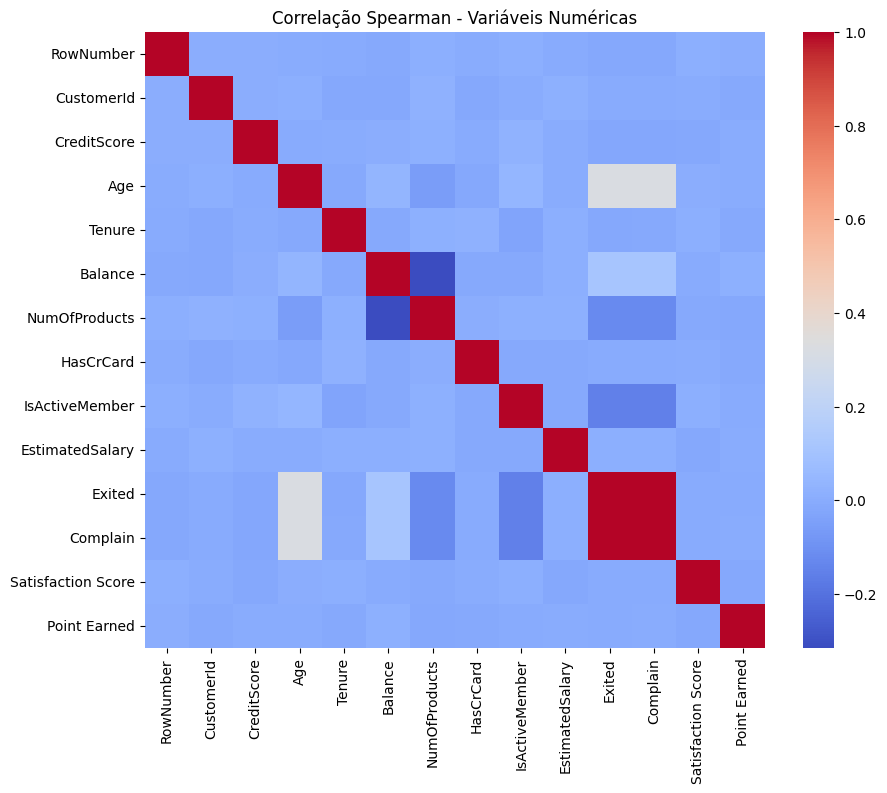

In [ ]:
spearman_corr = df.corr(method = 'spearman', numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(spearman_corr, cmap="coolwarm", annot=False)
plt.title("Correlação Spearman - Variáveis Numéricas")
plt.show()

In [ ]:
# Comparando as correlações com o target
corr = pd.DataFrame({
    "Peason": pearson_corr["Exited"],
    "Sperman": spearman_corr["Exited"]
})
corr

,Peason,Sperman
RowNumber,-0.016140,-0.016140
CustomerId,-0.006203,-0.006218
CreditScore,-0.026771,-0.022948
Age,0.285296,0.324012
Tenure,-0.013656,-0.013628
Balance,0.118577,0.111069
NumOfProducts,-0.047611,-0.125026
HasCrCard,-0.006976,-0.006976
IsActiveMember,-0.156356,-0.156356
EstimatedSalary,0.012490,0.012472


Correlação parcial

In [ ]:
target = "Exited"
num_cols = df.select_dtypes(include=["number"]).columns.drop(target)
cat_cols = df.select_dtypes(include=["object"]).columns

In [ ]:
partial_corr_pearson = []

for col in num_cols:
  pc = pg.partial_corr(
      data = df,
      x=col,
      y=target,
      covar=[c for c in num_cols if c!=col],
      method="pearson"
  )

  partial_corr_pearson.append((col, pc["r"].values[0]))

partial_corr_pearson_df = pd.DataFrame(partial_corr_pearson, columns=["Feature", "Partial_Correlation"])
partial_corr_pearson_df.sort_values("Partial_Correlation")

,Feature,Partial_Correlation
8,IsActiveMember,-0.029978
12,Point Earned,-0.019452
6,NumOfProducts,-0.016164
11,Satisfaction Score,-0.011738
4,Tenure,-0.007600
5,Balance,-0.004435
9,EstimatedSalary,0.000732
7,HasCrCard,0.001038
2,CreditScore,0.002235
0,RowNumber,0.008232


In [ ]:
partial_corr_spearman = []

for col in num_cols:
  pc = pg.partial_corr(
      data = df,
      x=col,
      y=target,
      covar=[c for c in num_cols if c!=col],
      method="spearman"
  )

  partial_corr_spearman.append((col, pc["r"].values[0]))

partial_corr_spearman_df = pd.DataFrame(partial_corr_spearman, columns=["Feature", "Partial_Correlation"])
partial_corr_spearman_df.sort_values("Partial_Correlation")

,Feature,Partial_Correlation
8,IsActiveMember,-0.028848
6,NumOfProducts,-0.023525
12,Point Earned,-0.018683
11,Satisfaction Score,-0.012017
4,Tenure,-0.007319
5,Balance,-0.007161
9,EstimatedSalary,0.000702
7,HasCrCard,0.001233
2,CreditScore,0.003498
0,RowNumber,0.008214


### Random Forest Importance

In [ ]:
X_aux = pd.get_dummies(df.drop(columns=["Exited","RowNumber","CustomerId","Surname"]), drop_first=True)
y_aux = df["Exited"]

rf_temp = RandomForestClassifier(random_state=42)
rf_temp.fit(X_aux, y_aux)

importance = pd.Series(rf_temp.feature_importances_, index=X_aux.columns)
importance.sort_values(ascending=False).head(10)

,0
Complain,0.827218
Age,0.064115
NumOfProducts,0.043023
Balance,0.011986
IsActiveMember,0.011056
Geography_Germany,0.009057
CreditScore,0.007295
EstimatedSalary,0.006689
Point Earned,0.006511
Tenure,0.003879


## Missings e possíveis vieses


In [ ]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
pd.crosstab(df["Gender"], df["Exited"], normalize="index")

Exited,0,1
Gender,,
Female,0.749285,0.250715
Male,0.835257,0.164743


In [ ]:
pd.crosstab(df["Geography"], df["Exited"], normalize="index")

Exited,0,1
Geography,,
France,0.838253,0.161747
Germany,0.675568,0.324432
Spain,0.833266,0.166734


In [ ]:
pd.crosstab(df["Complain"], df["Exited"], normalize="index")

Exited,0,1
Complain,,
0,0.999497,0.000503
1,0.004892,0.995108


> Quase 100% das pessoas que reclamam, saem do banco.

#  Preparação dos dados

## Normalização ou padronização


In [ ]:
df_model = df.drop(columns=["RowNumber","CustomerId","Surname"])
num_cols = df_model.select_dtypes(include=["number"]).columns.drop(target)
cat_cols = df_model.select_dtypes(include=["object"]).columns

In [ ]:
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder())
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols.tolist()),
        ("cat", categorical_transformer, cat_cols.tolist())
    ]
)

In [ ]:
# Teste sem o "Complain"
num_cols_c = num_cols.drop("Complain")

preprocessor_c = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols_c.tolist()),
        ("cat", categorical_transformer, cat_cols.tolist())
    ]
)

### Outliers

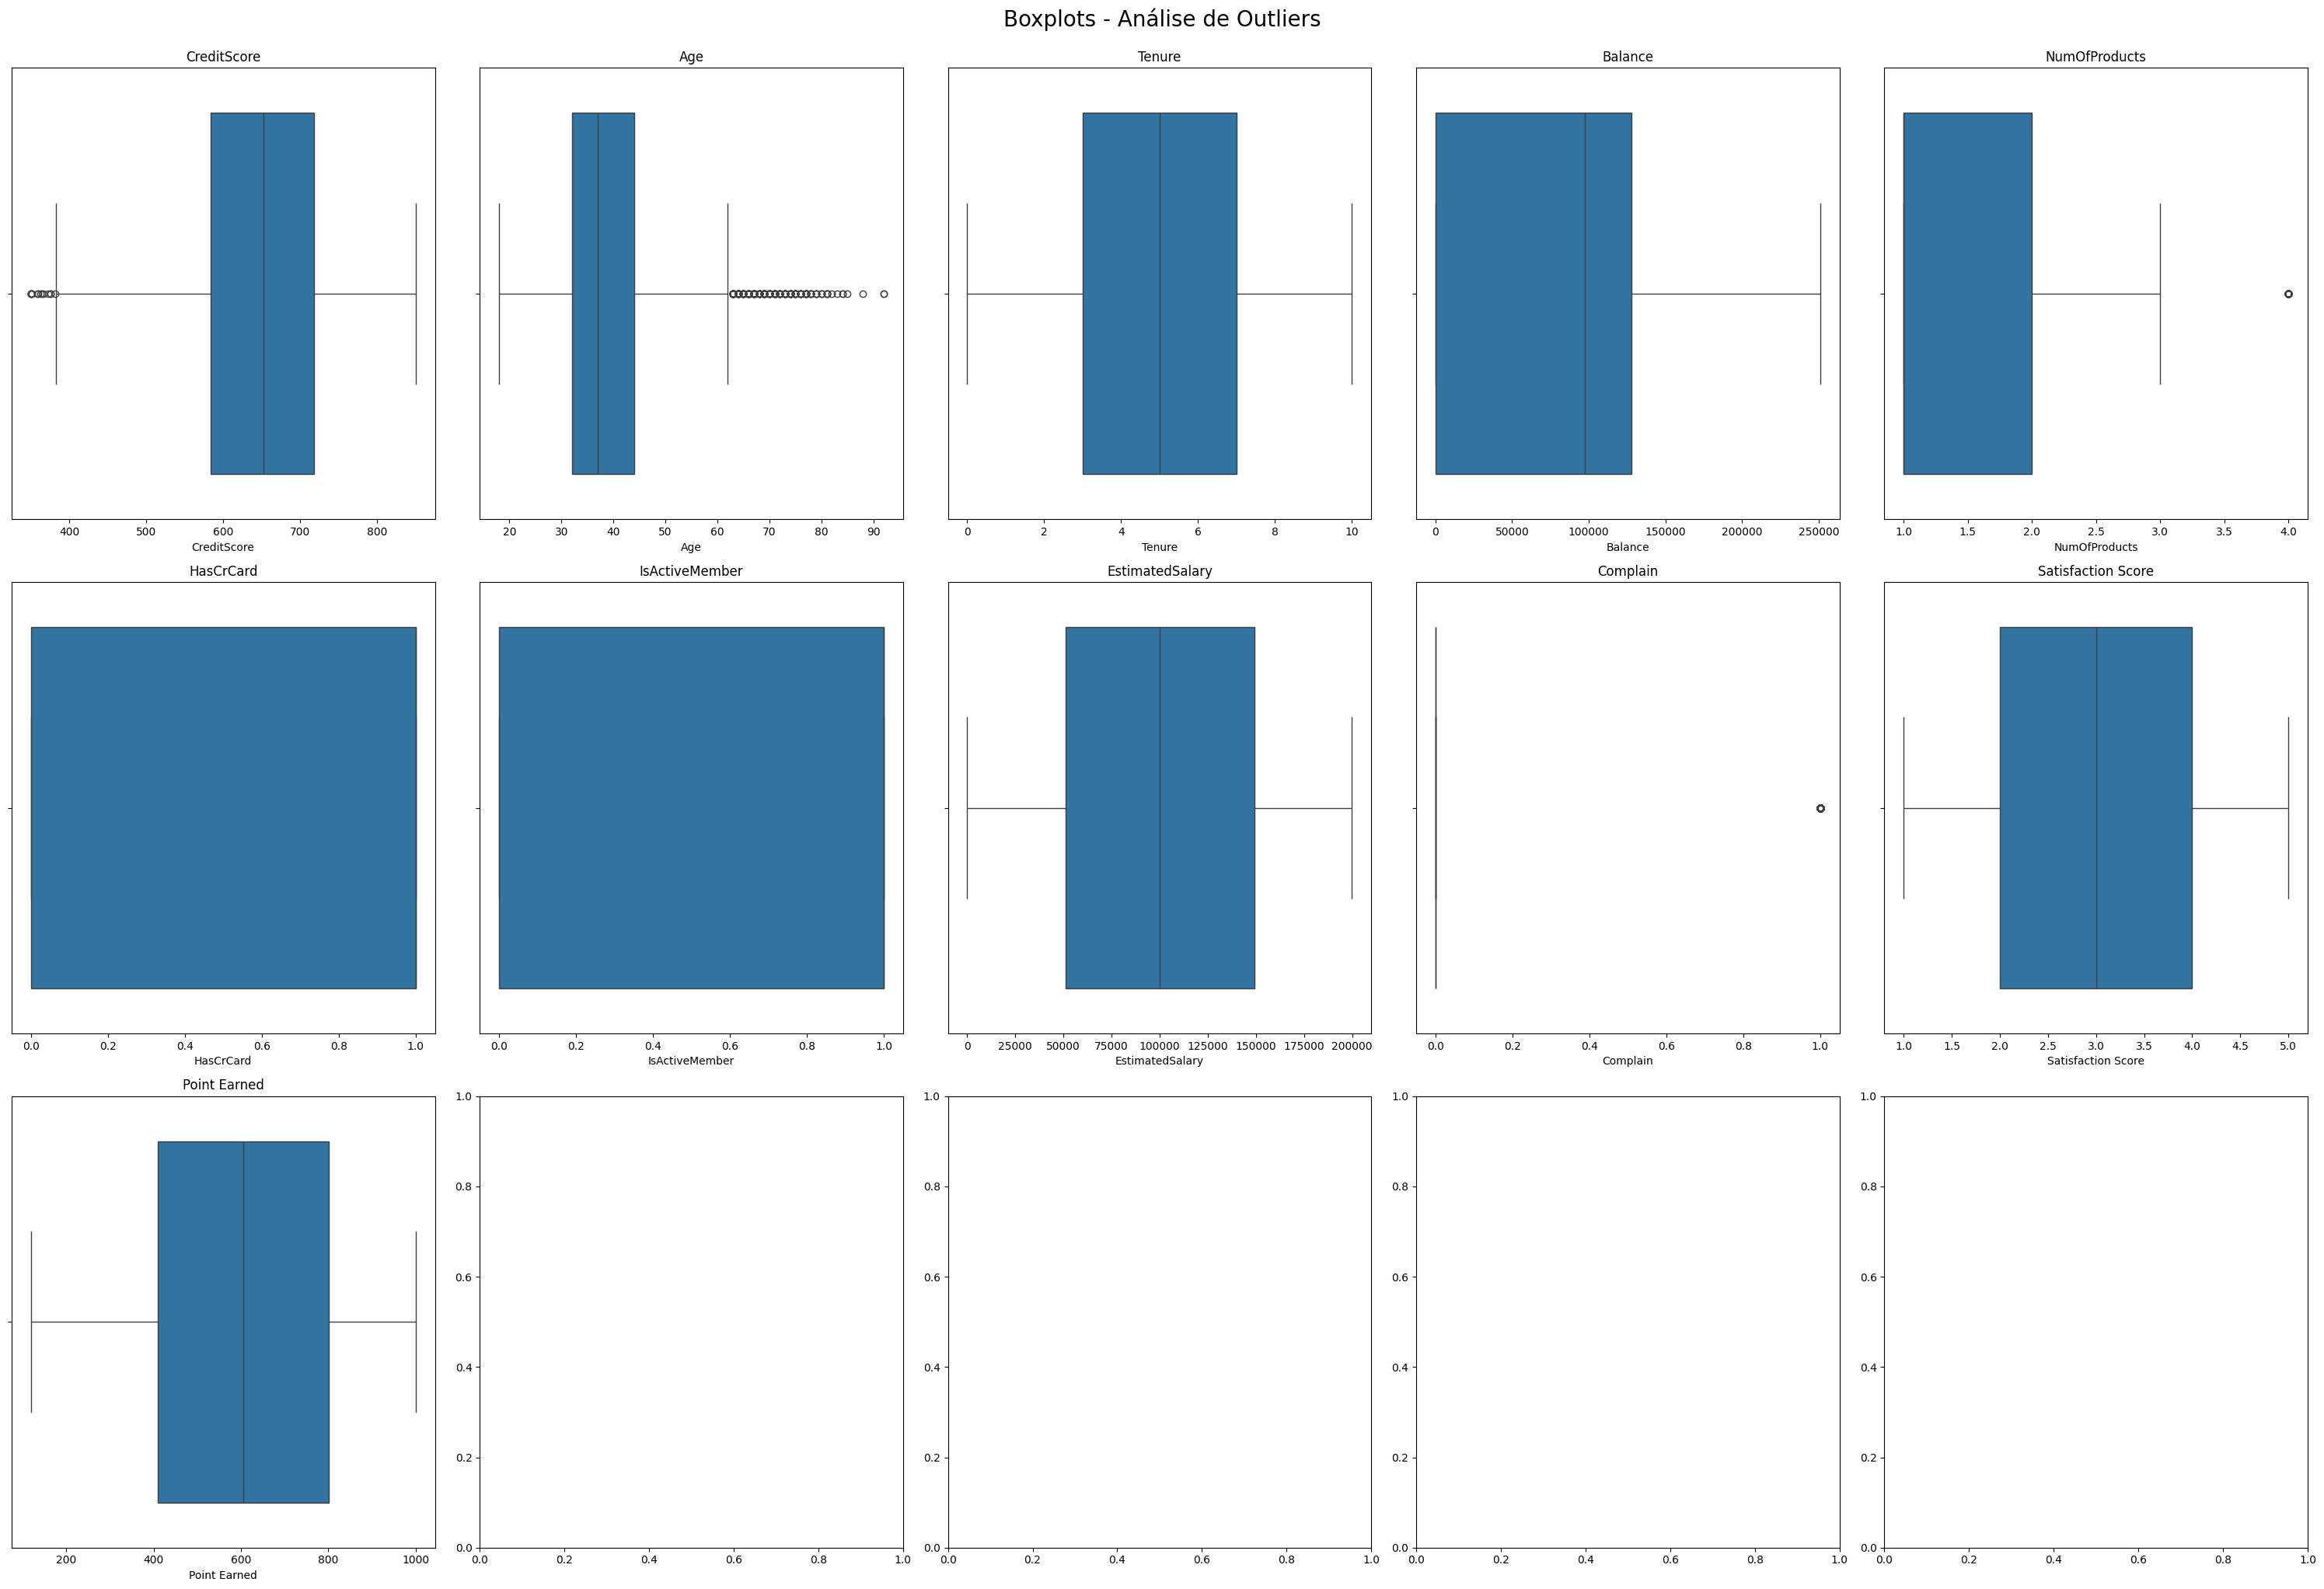

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(30, 20))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.suptitle("Boxplots - Análise de Outliers", y=1.02, fontsize=20)
plt.show()


## Tratamento de desbalanceamento


In [ ]:
X = df_model.drop(columns=[target])
y = df_model[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Teste sem 'Complain'

X_c = df_model.drop(columns=[target, 'Complain'])

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

## Justificativa das escolhas


# Modelagem (com todas variáveis)

In [ ]:
# Logistic Regression
lr = LogisticRegression(class_weight="balanced", max_iter=4000, random_state=42)
lr_params = {
    "model__C": loguniform(1e-3, 1e3),
    "model__solver": ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"],
    "model__penalty": ["l2"]
}

# Random Forest
rf = RandomForestClassifier(class_weight="balanced", random_state=42, n_jobs=-1)
rf_params = {
    "model__n_estimators": randint(10, 500),
    "model__max_depth": randint(1, 100),
    "model__min_samples_split": randint(2, 60),
    "model__min_samples_leaf": randint(1, 30),
    "model__max_features": ["sqrt", "log2", None],
    "model__bootstrap": [True, False]
}

# AdaBoost
base_tree = DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=42)
ada = AdaBoostClassifier(estimator=base_tree, random_state=42)
ada_params = {
    "model__n_estimators": [100, 200, 400, 600],
    "model__learning_rate": [0.01, 0.05, 0.1, 0.3, 0.5]
}

# SVM
svm = SVC(class_weight="balanced", random_state=42)
svm_params = {
    "model__kernel": ["linear", "poly", "rbf"],
    "model__C": loguniform(1e-3, 1e3),
    "model__gamma": ["scale", "auto"],
    }

In [ ]:
models = {
    "Logist": (lr, lr_params),
    "RF": (rf, rf_params),
    "Ada": (ada, ada_params),
    "SVM": (svm, svm_params)
}

searches = {}

for name, (model, params) in models.items():
    print(f"\n---------- {name} -----------")

    pipe = Pipeline([
        ("prep", preprocessor),
        ("model", model)
    ])

    randomSearch = RandomizedSearchCV(
        estimator=pipe,
        param_distributions=params,
        n_iter=10,
        scoring="f1",
        cv=cv,
        random_state=42,
        n_jobs=-1,
        refit=True,
    )

    randomSearch.fit(X_train, y_train)
    searches[name] = randomSearch

    print("Melhores parâmetros:", randomSearch.best_params_)
    print("Melhor F1:", randomSearch.best_score_)


---------- Logist -----------
Melhores parâmetros: {'model__C': np.float64(0.1767016940294795), 'model__penalty': 'l2', 'model__solver': 'sag'}
Melhor F1: 0.9966346763887654

---------- RF -----------
Melhores parâmetros: {'model__bootstrap': True, 'model__max_depth': 52, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 15, 'model__min_samples_split': 44, 'model__n_estimators': 81}
Melhor F1: 0.9966346763887654

---------- Ada -----------
Melhores parâmetros: {'model__n_estimators': 100, 'model__learning_rate': 0.01}
Melhor F1: 0.9966346763887654

---------- SVM -----------
Melhores parâmetros: {'model__C': np.float64(0.1767016940294795), 'model__gamma': 'scale', 'model__kernel': 'rbf'}
Melhor F1: 0.9966346763887654


Análise dos coeficientes

In [ ]:
coef = searches["Logist"].best_estimator_["model"].coef_[0]
feature_names = searches["Logist"].best_estimator_["prep"].get_feature_names_out()

odds_df = pd.DataFrame({
    "Coluna":  feature_names,
    "Coeficiente": coef,
    "Odds Ratio": np.exp(coef),
    "Coeficiente Absoluto": np.abs(coef)
}).sort_values("Coeficiente Absoluto", ascending=False)

In [ ]:
odds_df

,Coluna,Coeficiente,Odds Ratio,Coeficiente Absoluto
8,num__Complain,4.458298,86.340474,4.458298
1,num__Age,0.521438,1.684448,0.521438
6,num__IsActiveMember,-0.409742,0.663821,0.409742
10,num__Point Earned,-0.274311,0.760096,0.274311
9,num__Satisfaction Score,-0.161449,0.850910,0.161449
3,num__Balance,0.112095,1.118619,0.112095
19,cat__Card Type_SILVER,0.108622,1.114741,0.108622
12,cat__Geography_Germany,0.089141,1.093234,0.089141
18,cat__Card Type_PLATINUM,-0.088903,0.914934,0.088903
13,cat__Geography_Spain,-0.080998,0.922196,0.080998


# Modelagem (sem Complain)

In [ ]:
# Logistic Regression
lr_c = LogisticRegression(class_weight="balanced", max_iter=4000, random_state=42)
lr_params_c = {
    "model__C": loguniform(1e-3, 1e3),
    "model__solver": ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"],
    "model__penalty": ["l2"]
}

# Random Forest
rf_c = RandomForestClassifier(class_weight="balanced", random_state=42, n_jobs=-1)
rf_params_c = {
    "model__n_estimators": randint(10, 500),
    "model__max_depth": randint(1, 100),
    "model__min_samples_split": randint(2, 60),
    "model__min_samples_leaf": randint(1, 30),
    "model__max_features": ["sqrt", "log2", None],
    "model__bootstrap": [True, False]
}

# AdaBoost
base_tree_c = DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=42)
ada_c = AdaBoostClassifier(estimator=base_tree, random_state=42)
ada_params_c = {
    "model__n_estimators": [100, 200, 400, 600],
    "model__learning_rate": [0.01, 0.05, 0.1, 0.3, 0.5]
}

# SVM
svm_c = SVC(class_weight="balanced", random_state=42)
svm_params_c = {
    "model__kernel": ["linear", "poly", "rbf"],
    "model__C": loguniform(1e-3, 1e3),
    "model__gamma": ["scale", "auto"],
    }


In [ ]:
models_c = {
    "Logist": (lr_c, lr_params_c),
    "RF": (rf_c, rf_params_c),
    "Ada": (ada_c, ada_params_c),
    "SVM": (svm_c, svm_params_c)
}

searches_c = {}

for name, (model, params) in models_c.items():
    print(f"\n---------- {name} -----------")

    pipe = Pipeline([
        ("prep", preprocessor_c),
        ("model", model)
    ])

    randomSearch_c = RandomizedSearchCV(
        estimator=pipe,
        param_distributions=params,
        n_iter=10,
        scoring="f1",
        cv=cv,
        random_state=42,
        n_jobs=-1,
        refit=True,
    )

    randomSearch_c.fit(X_train_c, y_train_c)
    searches_c[name] = randomSearch_c

    print("Melhores parâmetros:", randomSearch_c.best_params_)
    print("Melhor F1:", randomSearch_c.best_score_)


---------- Logist -----------
Melhores parâmetros: {'model__C': np.float64(0.1767016940294795), 'model__penalty': 'l2', 'model__solver': 'sag'}
Melhor F1: 0.4921270301519991

---------- RF -----------
Melhores parâmetros: {'model__bootstrap': True, 'model__max_depth': 75, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 4, 'model__min_samples_split': 41, 'model__n_estimators': 161}
Melhor F1: 0.6179520990629255

---------- Ada -----------
Melhores parâmetros: {'model__n_estimators': 600, 'model__learning_rate': 0.3}
Melhor F1: 0.5342948787274174

---------- SVM -----------
Melhores parâmetros: {'model__C': np.float64(0.1767016940294795), 'model__gamma': 'scale', 'model__kernel': 'rbf'}
Melhor F1: 0.5841250195976024


# Avaliação (com todas variáveis)


Modelo: Logist


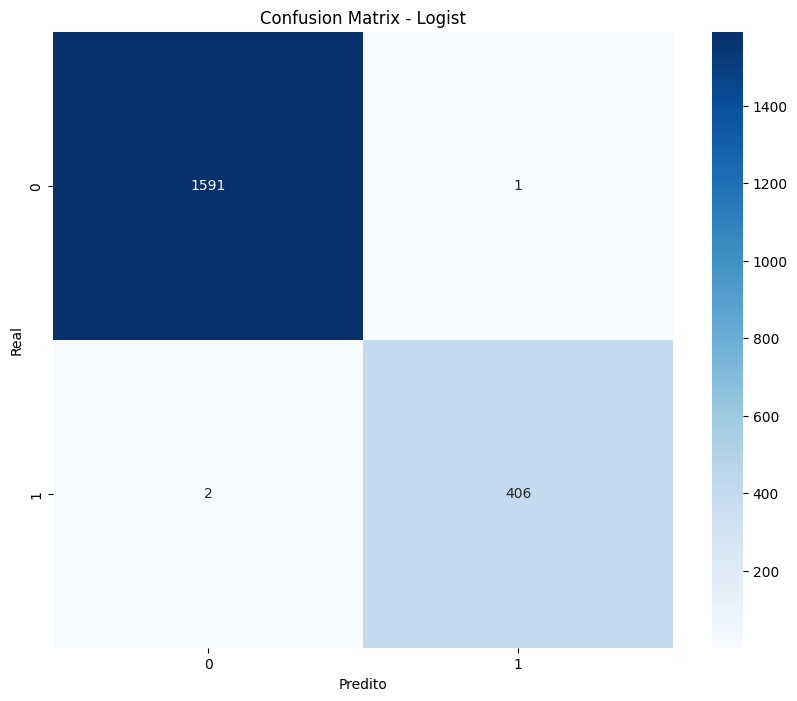


Modelo: RF


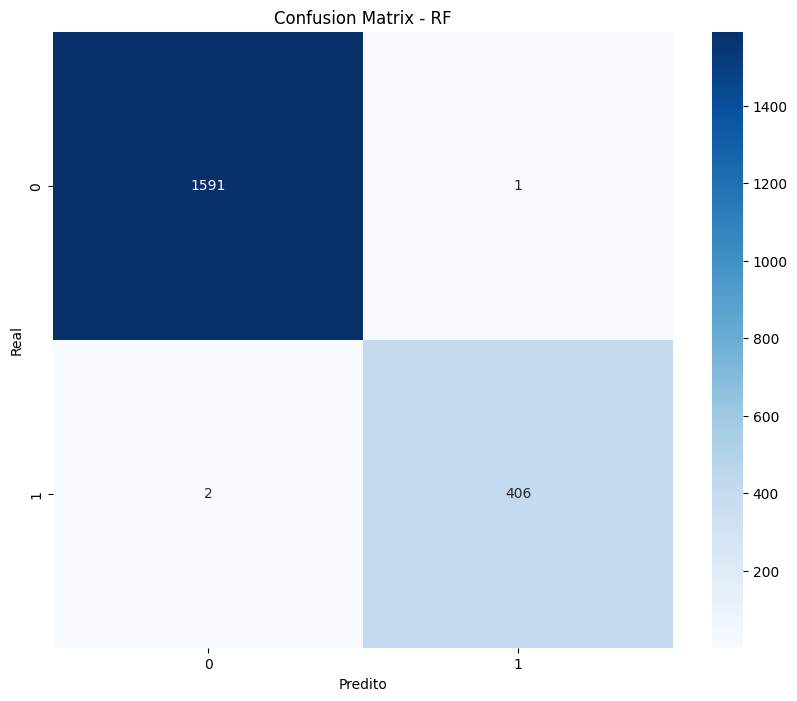


Modelo: Ada


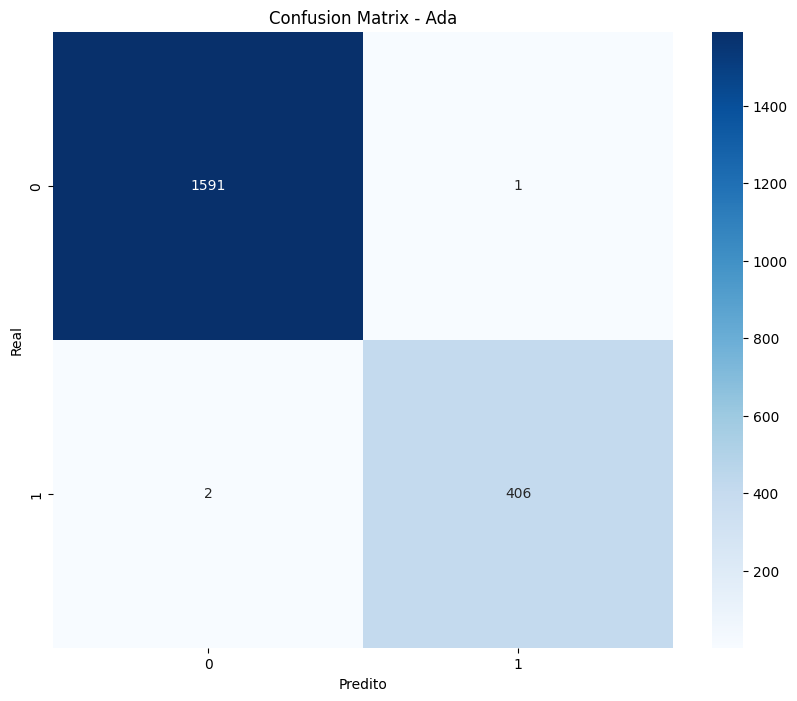


Modelo: SVM


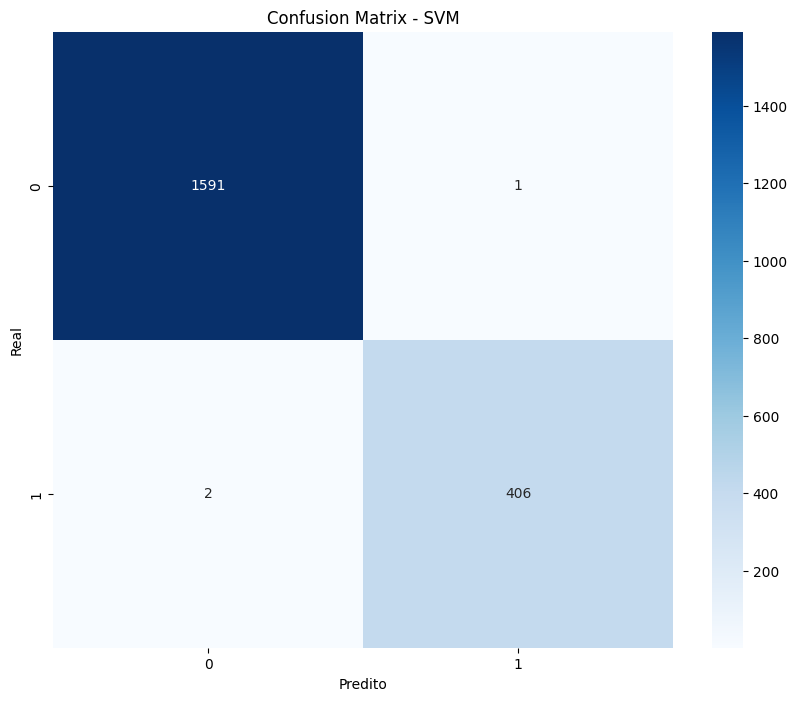

In [ ]:
for name, rs in searches.items():

    best_pipe = rs.best_estimator_
    y_pred = best_pipe.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\nModelo: {name}")
    # print(cm)

    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.show()

# Avaliação (sem Complain)


Modelo: Logist


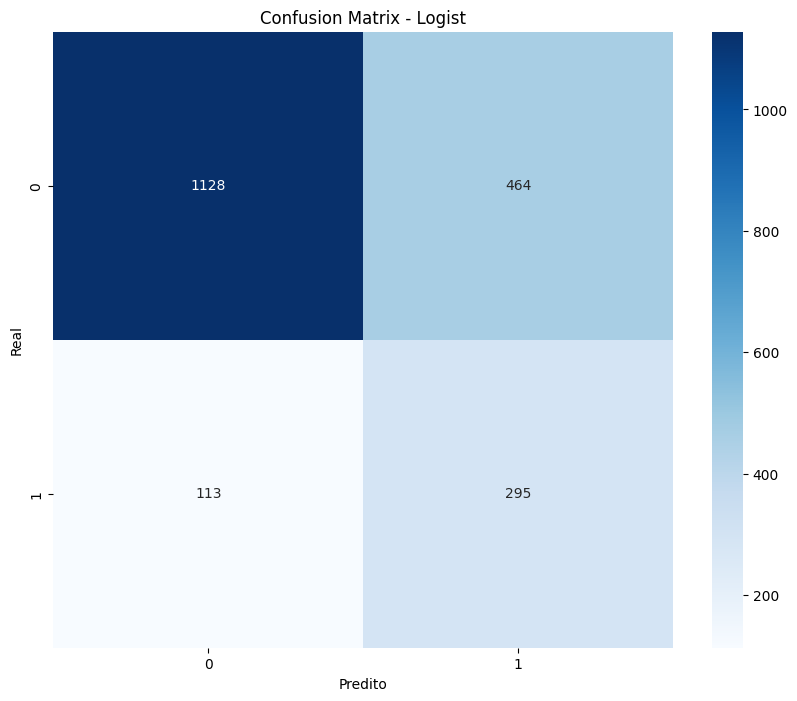


Modelo: RF


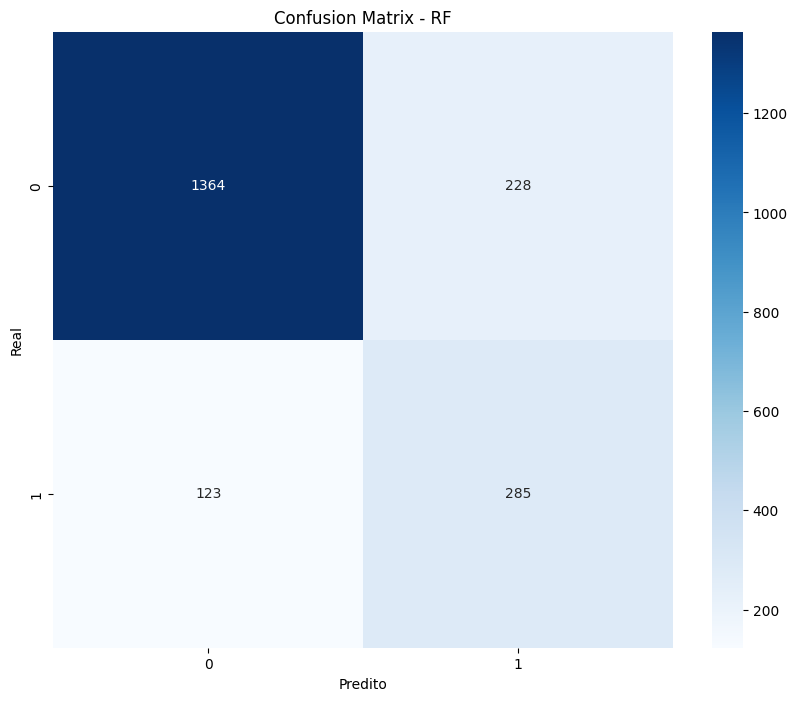


Modelo: Ada


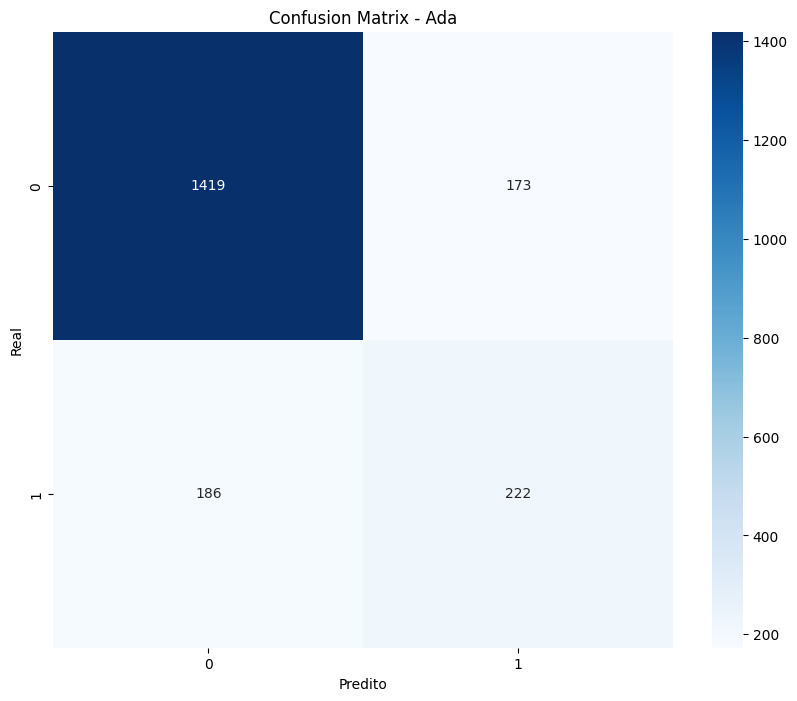


Modelo: SVM


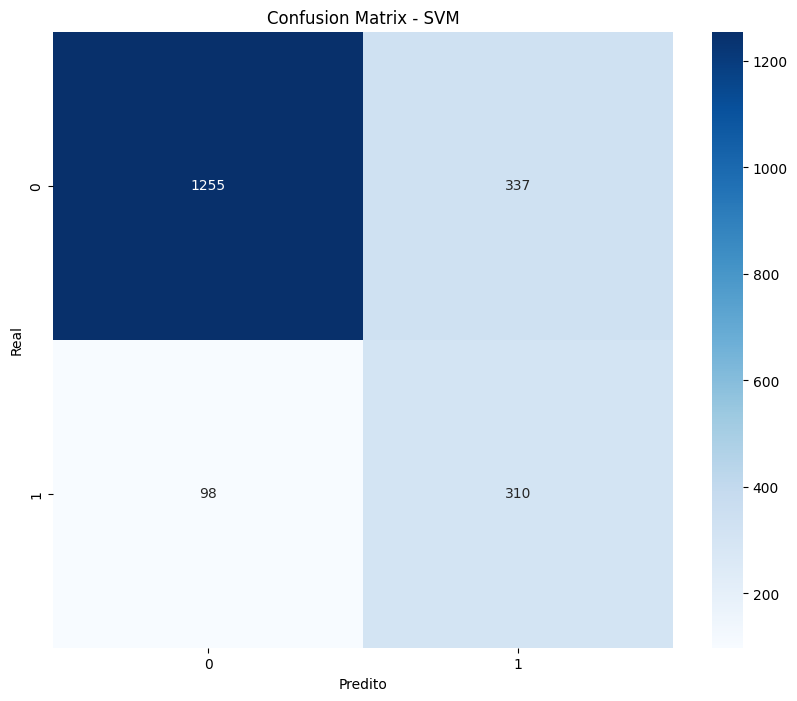

In [ ]:
for name, rs in searches_c.items():

    best_pipe = rs.best_estimator_
    y_pred = best_pipe.predict(X_test_c)
    cm = confusion_matrix(y_test_c, y_pred)

    print(f"\nModelo: {name}")
    # print(cm)

    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.show()

#Conclusão executiva


Recall alto --> menos churn perdido

Precision alta --> menos clientes acionados desnecessariamente

ROC-AUC alto --> boa separação

Como o objetivo é retenção --> Recall.


Falso Negativo (FN): churn que o modelo não detecta → perde oportunidade de retenção (custo alto de perda de cliente).

Falso Positivo (FP): cliente que não sairia, mas recebe ação → custo de campanha/benefício (custo de retenção desnecessária)

* O modelo resolve o gap identificado?

(Falar sobre as métricas encontradas, talvez trazer uma tabela de comparação)

----

* Onde ele falha?

Pode errar perfis não tratados no treinamento.

----
* O que seria necessário para levar isso para produção?


----
* Há potencial de geração de valor (ex.: redução de custo, aumento de eficiência, mitigação de risco)? Caso positivo, explore os resultados sob uma ótica qualitativa ou estimada, considerando impacto financeiro, ROI ou payback.


----


# Riscos e limitações


* Riscos técnicos

Data Leakage.

---

* Riscos de viés


---
* Riscos regulatórios ou operacionais

LGPD

Diiculdade em explicação e, consequentemente, auditabilidade desses sistemas.

----


# Apresentação do PoC

Demonstração da solução concebida em funcionamento, preferencialmente como:
* Uma aplicação completa (ex.: Streamlit), e/ou
* Um notebook ou programa em Python executável via linha de comando.